## Adding Noise to Images

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from smalldiffusion import (
    TimeInputMLP, ScheduleLogLinear, training_loop, samples,
    DatasaurusDozen, Swissroll, ModelMixin
)
from pathlib import Path

In [2]:
save_dir=Path('/home/stephen/sora/adding_noise_to_images_diff_rand_noise_per_step')
save_dir.mkdir(exist_ok=True)

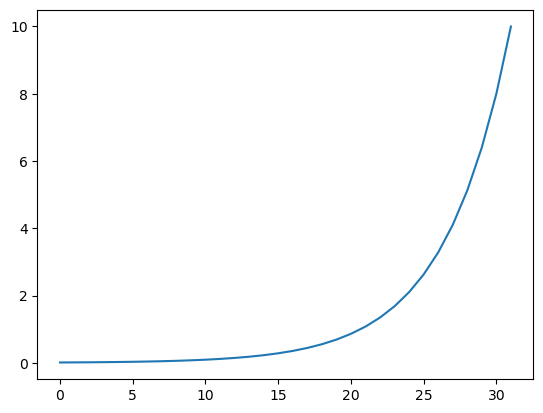

In [3]:
schedule = ScheduleLogLinear(N=32, sigma_min=0.01, sigma_max=10) #N=200
plt.plot(schedule.sigmas)

In [4]:
im=np.array(Image.open('n02123045_1955.jpg'))/255.

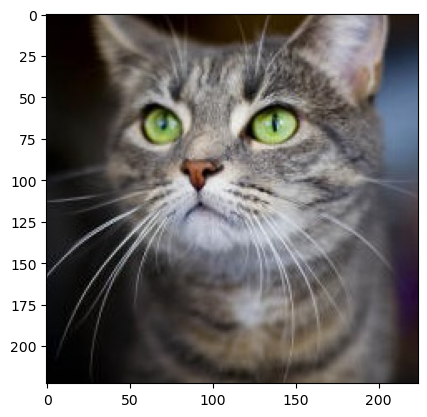

In [5]:
plt.imshow(im)

In [6]:
eta=np.random.randn(*im.shape)

In [7]:
for i in range(len(schedule.sigmas)):
    eta=np.random.randn(*im.shape)
    im_noisy=im+eta*schedule.sigmas[i].item()
    im_norm=(im_noisy-np.min(im_noisy))/(np.max(im_noisy)-np.min(im_noisy)) #Scale between 0 and 1
    im_pil=Image.fromarray((im_norm*255).astype('uint8'))
    im_pil.save(save_dir/(str(i)+'.png'))
    
    # plt.clf()
    # plt.imshow(im_norm)
    # plt.savefig(str(save_dir/(str(i)+'.png')))